In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II La régression logistique en pratique
df = pd.read_csv("data/gold.csv")

In [109]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [110]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y_train =  labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.preprocessing import StandardScaler

set_config(display='diagram')


categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 
       'PaperlessBilling', 'PaymentMethod'
       ]

numerical_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "nb_service_internet",
]

numerical_transformer = StandardScaler() # StandardScaler()

# Create the OneHotEncoder
categorical_transformer = OneHotEncoder(categories='auto', sparse_output=True)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    remainder="passthrough"
)

log_reg = LogisticRegression()
pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('log_reg', log_reg)
])

In [112]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'nb_service_internet'])])),
                ('log_reg', LogisticRegression())])

In [113]:
pipe.score(X_test, y_test)

# metrics f1_score , recall_score, precision_score , accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

y_pred = pipe.predict(X_test)

score = f1_score(y_test, y_pred)
print("f1_score : ", score)

score = recall_score(y_test, y_pred)
print("recall_score : ", score)

score = precision_score(y_test, y_pred)
print("precision_score : ", score)

score = accuracy_score(y_test, y_pred)
print("accuracy_score : ", score)


f1_score :  0.6390870185449358
recall_score :  0.6005361930294906
precision_score :  0.6829268292682927
accuracy_score :  0.8204400283889283


[![](https://mermaid.ink/img/pako:eNqVlMFS2zAQhl9Fox56CYztENt1ZzoTEhJ6aOkMTA_FPWxspRHYkitLkJThXXokl76EX6wrxQQCk059k1b_fv9qvdYdzWTOaEJ_KKgW5OI4FYQML1M6btYzo1P6nRwckJSezTQTXJGC1UTIsiY5LjJQkOlmrXit-U-DEahU81CTAohWIOq5VCVoLkVKEfOBOPox0j_vR0jrZOqt8_BKGs02zq_VwpR269bNb2tc4Blr_UbWb4R-o38mgrVo1i8RbQEXjzdpi8ilEE6cv2UCr9n8EazEFYEblqGCYA_WlZIZq2tmVFvK2JYyto3dl77tmDvdB2uLGmEY6zEC-3XFNGHLqgAuMMQEMZrjFQCZCChl3jwUjx05sWWcXNoPupuWIbBZP_GhyEzR3vgGCvSuyfnp8AuppNnzMVqLibWYoMXX52mZA9qrPXlIUWtluGK2zjFomCgoGc6FS2lxU4ub2sa9FJCsBTyN6XA-59nClU3cRNvCyIyx-hZU2RJPLfEUidNXCgIO8KwRE_44vB9tWsHF9bleId4j6C2vWfImYFke-b3N9uCW53qRBNXy_a7e76gPOur7HfVHHfWDjvqwoz76Dz3tUfwLS-A5vlh3Nj-leoG_T0oTXOZsDqbAaUjFPUrBaHm-EhlNcEhYj5oqB83GHHAyyt3gSc61VDSZQ1FjsALxTcqthrnTT5uH0r2XTkKTO7qkiR_Hh5Hvx1EUBMGg33_Xoyua9COMxp7vxbEfeH7o3_foL8f0DsOjcND34tCLwtDrx_d_Ach56-0?type=png)](https://mermaid.live/edit#pako:eNqVlMFS2zAQhl9Fox56CYztENt1ZzoTEhJ6aOkMTA_FPWxspRHYkitLkJThXXokl76EX6wrxQQCk059k1b_fv9qvdYdzWTOaEJ_KKgW5OI4FYQML1M6btYzo1P6nRwckJSezTQTXJGC1UTIsiY5LjJQkOlmrXit-U-DEahU81CTAohWIOq5VCVoLkVKEfOBOPox0j_vR0jrZOqt8_BKGs02zq_VwpR269bNb2tc4Blr_UbWb4R-o38mgrVo1i8RbQEXjzdpi8ilEE6cv2UCr9n8EazEFYEblqGCYA_WlZIZq2tmVFvK2JYyto3dl77tmDvdB2uLGmEY6zEC-3XFNGHLqgAuMMQEMZrjFQCZCChl3jwUjx05sWWcXNoPupuWIbBZP_GhyEzR3vgGCvSuyfnp8AuppNnzMVqLibWYoMXX52mZA9qrPXlIUWtluGK2zjFomCgoGc6FS2lxU4ub2sa9FJCsBTyN6XA-59nClU3cRNvCyIyx-hZU2RJPLfEUidNXCgIO8KwRE_44vB9tWsHF9bleId4j6C2vWfImYFke-b3N9uCW53qRBNXy_a7e76gPOur7HfVHHfWDjvqwoz76Dz3tUfwLS-A5vlh3Nj-leoG_T0oTXOZsDqbAaUjFPUrBaHm-EhlNcEhYj5oqB83GHHAyyt3gSc61VDSZQ1FjsALxTcqthrnTT5uH0r2XTkKTO7qkiR_Hh5Hvx1EUBMGg33_Xoyua9COMxp7vxbEfeH7o3_foL8f0DsOjcND34tCLwtDrx_d_Ach56-0)

In [114]:
import shap
# Obtenir les noms des caractéristiques après la transformation
feature_names = preprocessor.transformers_[0][1].get_feature_names_out()
# Ajouter les caractéristiques numériques à la liste
feature_names = list(feature_names) + numerical_features

# Transformer les données d'entraînement avec le préprocesseur
X_test_transformed = preprocessor.transform(X_test)

# Crée un objet explainer en utilisant le modèle
explainer = shap.Explainer(pipe.named_steps['log_reg'], X_test_transformed)

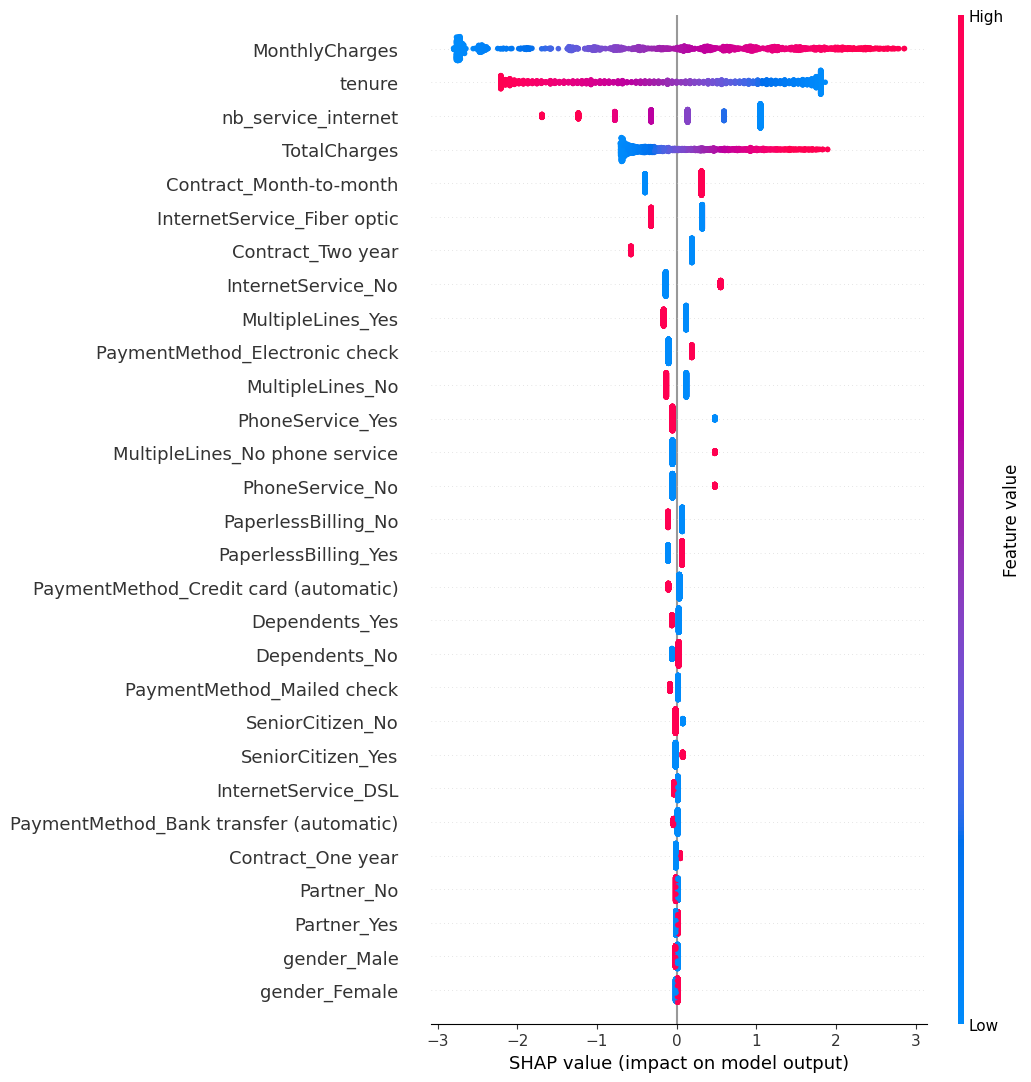

In [115]:
import shap.plots

# Calcule les valeurs SHAP pour les caractéristiques
shap_values = explainer(X_test_transformed)

# Construire le DataFrame de SHAP
# values : valeurs SHAP pour chaque caractéristique
# base_values : valeur de base pour chaque caractéristique
# data : données d'entraînement
# feature_names : noms des caractéristiques

shap_values = shap.Explanation(values=shap_values.values, 
                               base_values=shap_values.base_values, 
                               data=X_test_transformed, 
                               feature_names=feature_names)
# Affiche le graphique beeswarm
shap.plots.beeswarm(shap_values, max_display=50)

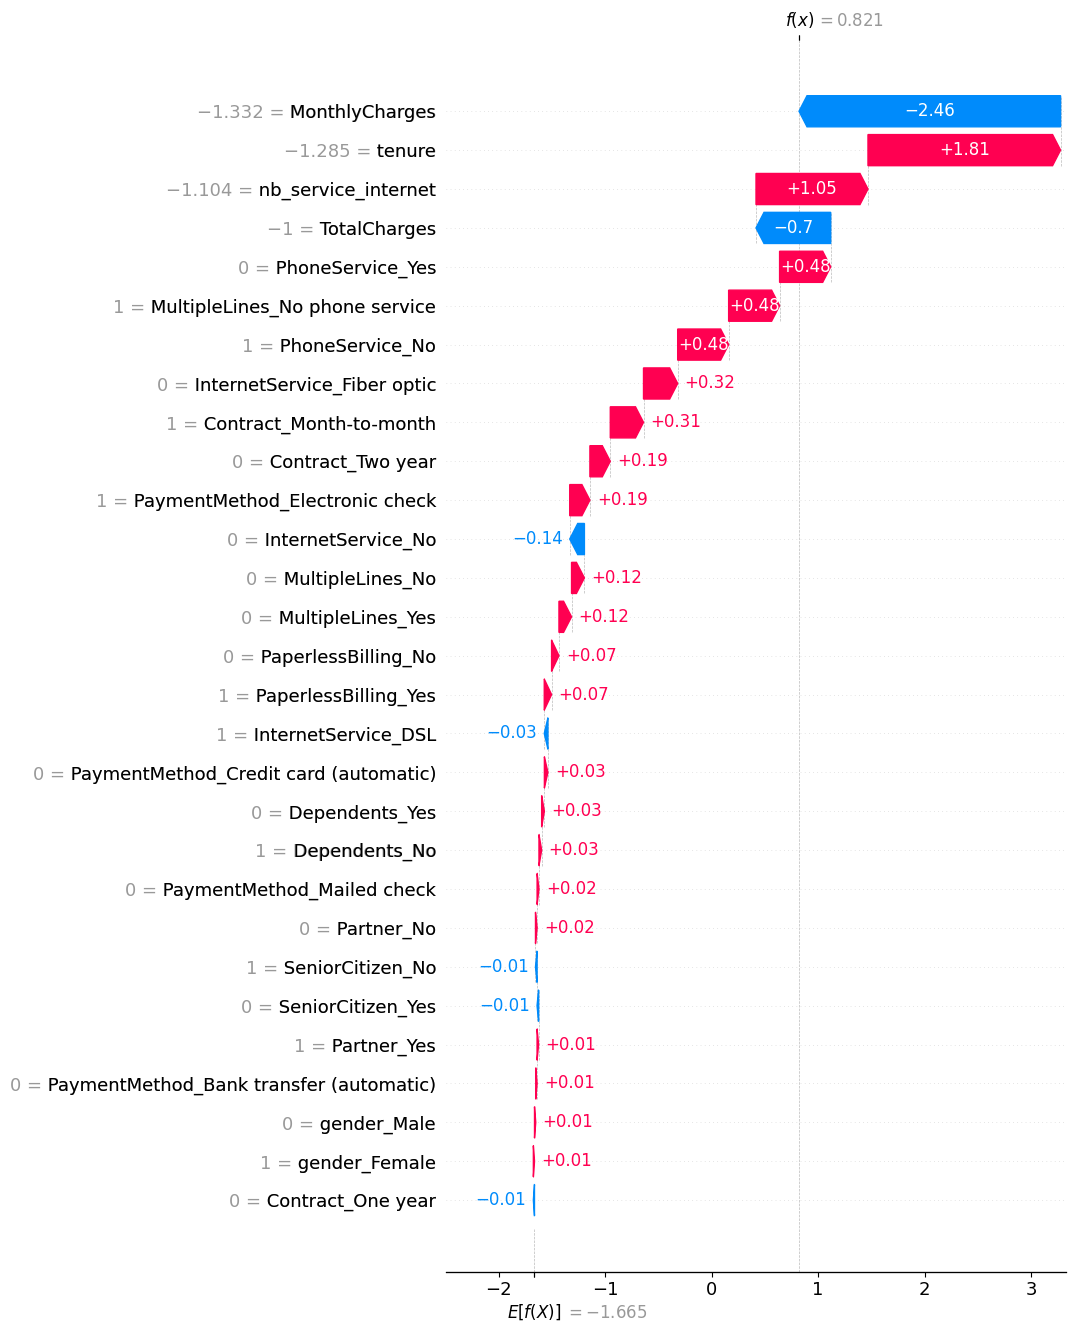

In [116]:
# waterfalls
shap.plots.waterfall(shap_values[0] , max_display=50)

In [117]:
# Calcul de la valeur de E[f(x)]
e_f_x = shap_values.base_values[1]

print("E[f(x)] =", e_f_x)

E[f(x)] = -1.6646486114631616


In [118]:
# df des valeurs réel et prédites pour l'entrainement
df_train = pd.DataFrame(X_test_transformed, columns=feature_names)
df_train['y'] = y_test
df_train['y_pred'] = pipe.predict(X_test)

df_train.head(10)

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,nb_service_internet,y,y_pred
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-1.284605,-1.331629,-0.999687,-1.103761,1,1
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.353238,-1.316672,-0.570322,-1.103761,0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.803645,-1.512772,-0.554746,-1.103761,0,0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-1.284605,0.381756,-0.976907,-0.563953,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.417836,-0.475768,0.429966,-0.563953,0,0
5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.458782,0.822150,1.697091,-0.024145,1,0
6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,-0.383791,0.408345,-0.233181,1.055471,0,0
7,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.622566,0.240497,1.206171,1.055471,0,0
8,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.540674,1.300768,2.193137,1.055471,1,0
9,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-1.284605,-1.511110,-1.002073,-1.103761,1,0
